# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs.

In [1]:
!pip install langchain langchain_openai langchain_community diffusers torch

In [2]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [3]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')


## Dall-E

In [4]:
import openai
from langchain.tools import tool
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
import sys

In [5]:
# Detect if the environment is Colab
try:
    import google.colab  # If in Colab
    is_colab = True
except ImportError:
    is_colab = False

# Set your OpenAI API key
openai.api_key = OPENAI_API_KEY

In [6]:
# Global variable to capture image URL
latest_image_url = None

@tool
def generate_image(prompt: str) -> str:
    """Generate an image using DALL·E based on the given prompt."""
    global latest_image_url
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response.data[0].url
    latest_image_url = image_url
    return image_url


In [8]:
# Initialize the agent
tools = [generate_image]
llm = ChatOpenAI(temperature=0)

mrkl = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
result = mrkl.invoke("How would you visualize a parrot playing soccer?")




> Entering new AgentExecutor chain...
I can use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "parrot playing soccer"
Observation: https://oaidalleapiprodscus.blob.core.windows.net/private/org-dzigN8KuEelRcMigmVSdXEVy/user-VaNU933WUZKmrPhjBS5VeKfL/img-ZQ2uKhIFvfWUb9WPDnfvd7FB.png?st=2025-04-23T09%3A06%3A37Z&se=2025-04-23T11%3A06%3A37Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=475fd488-6c59-44a5-9aa9-31c4db451bea&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-04-23T02%3A00%3A18Z&ske=2025-04-24T02%3A00%3A18Z&sks=b&skv=2024-08-04&sig=9XoFVRAR5On1uueD%2BI/MieswdV52Eo8ZVRTi6P6mt88%3D
Thought:The image of a parrot playing soccer has been successfully generated.
Final Answer: The visualization of a parrot playing soccer can be seen in the generated image.

> Finished chain.


In [9]:

# Display the image based on the environment
if is_colab:
    # Colab: Use IPython to display image inline
    from IPython.display import Image, display
    display(Image(url=latest_image_url))
else:
    # Local: Use PIL or other method to show the image
    from PIL import Image as PILImage
    import requests
    from io import BytesIO
"""
    # Download and display image
    response = requests.get(latest_image_url)
    img = PILImage.open(BytesIO(response.content))
    img.show()  # This will open the image using the default image viewer
"""

'\n    # Download and display image\n    response = requests.get(latest_image_url)\n    img = PILImage.open(BytesIO(response.content))\n    img.show()  # This will open the image using the default image viewer\n'

## StableDiffusion

In [ ]:
"""pip instal transformers>=4.25"""

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



In [11]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [ ]:

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, low_cpu_mem_usage=False)
pipe = pipe.to("cuda")

prompt = "How would you visualize a parot playing soccer?"
image = pipe(prompt).images[0]



# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()



## AutoPipelineForText2Image

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

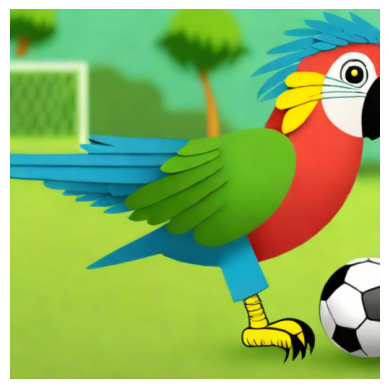

In [ ]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16
).to("cuda")

image = pipe("How would you visualize a parot playing soccer?").images[0]




# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()


